#**Metricas** de negocio
Estas seran nuestras metricas desde manera empresarial y no estadistico
- Producto más vendido
- Ingreso total 2024-2025
- Més con mas venta
- Estado de envio mas frecuente
- Red social con mas fluencia o valor en el mercado



##Parte 1: Instalar e Importar Librerias

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install -U -q PyDrive

Importando librerias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

###Cargaremos y Previsualizaremos el conjunto de Datos, en este caso el excel

In [ ]:
# Autenticación
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Replace with the correct file ID from the URL
file_id = "1LYZWcK8RHVM9YVwXoZgQQWqjy9KBH1og2di2v1O2FSI"
downloaded = drive.CreateFile({'id': file_id})

# Export the file to xlsx format before downloading
downloaded.GetContentFile('Ventas_Moops_2024_2025.xlsx', mimetype='application/vnd.openxmlformats-officedocument.spreadsheetml.sheet')

# Leer el archivo
import pandas as pd
df = pd.read_excel("Ventas_Moops_2024_2025.xlsx")
df.head()

,Diseños pedidos,Modelo de celular,Modelo numero,Talla,Tamaño,Diseño completos,Anticipo,Pagos,Tipo de Fundas,Color,Cliente,Producto,Lugar,Fecha de entrega,Red social de venta,Precio,Lugares de Envio
0,RICK PEPINILLO,Iphone,16,NaN,NaN,si,si,COMPLETO,Marco,Transparente,Alfredo,Funda,CDMX,2024-01-18,Facebook,320,NaN
1,Ferxxo,Iphone,13,NaN,NaN,si,si,COMPLETO,Acrigel,Transparente,Alfredo,Funda,CDMX,2024-01-15,Facebook,200,NaN
2,PAISAJE CON ERNESTO,Iphone,14,NaN,NaN,no,si,COMPLETO,Marco,Transparente,Ricardo,Funda,CDMX,2024-01-16,Facebook,320,NaN
3,PAISAJE CON ERNESTO,Iphone,14,NaN,NaN,no,si,COMPLETO,Marco,Transparente,Ricardo,Funda,CDMX,2024-03-14,Facebook,320,NaN
4,Ferxxo,Iphone,14,NaN,NaN,si,si,COMPLETO,Reforzada,Transparente,yayoo,Funda,CDMX,2024-04-10,Facebook,290,NaN


###Exploraremos los datos que se encuentran en la tabla, los datos necesarios e importantes

Visualizaremos los tipos de datos

In [ ]:
df.dtypes

,0
Diseños pedidos,object
Modelo de celular,object
Modelo numero,object
Talla,object
Tamaño,object
Diseño completos,object
Anticipo,object
Pagos,object
Tipo de Fundas,object
Color,object


**Analizaremos los nombres de las columnas para usarlas**

In [ ]:
df.columns

Index(['Diseños pedidos', 'Modelo de celular', 'Modelo numero', 'Talla',
       'Tamaño', 'Diseño completos', 'Anticipo', 'Pagos', 'Tipo de Fundas',
       'Color', 'Cliente', 'Producto ', 'Lugar', 'Fecha de entrega',
       'Red social de venta', 'Precio', 'Lugares de Envio'],
      dtype='object')

Renombraremos la columna Unnamed: 3 a Tamaño

In [ ]:
#RENOMBRAREMOS COLUMNA
df.rename(columns={'Unnamed:3':'Tamaño'},inplace=True)


## Metrica 1: Producto más vendido

In [ ]:
#analizaremos los productos que tenemos y los contaremos
df_mas_vendido=df['Producto '].value_counts()
df_mas_vendido

,count
Producto,
Funda,239
Cuadro,38
Sudadera,33
Playera,14


Apartir de aqui veremos la estructura para cada producto, ya que cada uno se dividae como de gfundas teniendo (acrigel, marco y reforzada), sudaderas(CH, M, G y EG) y cuadros (4 tamaños)

In [ ]:
#Agruparemos los diferentes tamaños, vienen en diferentes columnas por lo que se evaluara de manera consiente
#primero veamos las columnas
df.columns

Index(['Diseños pedidos', 'Modelo de celular', 'Modelo numero', 'Talla',
       'Tamaño', 'Diseño completos', 'Anticipo', 'Pagos', 'Tipo de Fundas',
       'Color', 'Cliente', 'Producto ', 'Lugar', 'Fecha de entrega',
       'Red social de venta', 'Precio', 'Lugares de Envio'],
      dtype='object')

In [ ]:
#Agrupamos primero las fundas
df_Tipo_de_fundas=df['Tipo de Fundas'].groupby(df['Producto ']).value_counts()
df_Tipo_de_fundas

Producto   Tipo de Fundas
Funda      Reforzada         164
           Acrigel            51
           Marco              24
Name: count, dtype: int64

In [ ]:
#Agruparemos los tamaños de sudadera
df_talla=df['Talla'].groupby(df['Producto ']).value_counts()
df_talla

Producto   Talla       
Playera    Mediana          7
           Grande           6
           Chica            1
Sudadera   Grande          17
           Chica            7
           Extra Grande     6
           Mediana          3
Name: count, dtype: int64

In [ ]:
#Agruparemos los tamaños de cuadro
df_tamaño=df['Tamaño'].groupby(df['Producto ']).value_counts()
df_tamaño

Producto   Tamaño     
Cuadro     CARTA          34
           DOBLE CARTA     2
           MEDIA CARTA     2
Name: count, dtype: int64

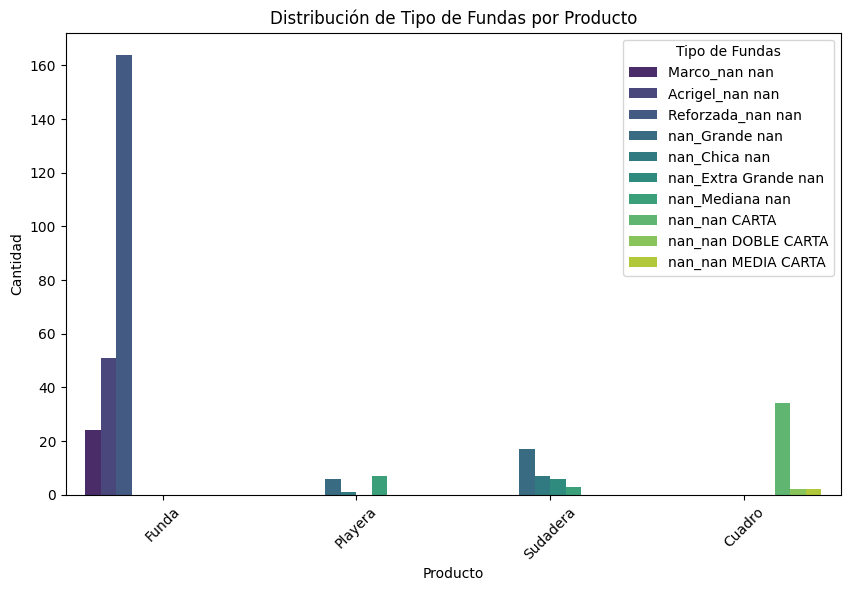

In [ ]:
# Se graficara una de los poprducto mas vendido y otras de cada seccion
df['Fundas_Talla'] = df['Tipo de Fundas'].astype(str) + '_' + df['Talla'].astype(str)+ ' '+ df['Tamaño'].astype(str)
df['Fundas_Talla'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Producto ', hue='Fundas_Talla', palette='viridis')
plt.title('Distribución de Tipo de Fundas por Producto')
plt.xlabel('Producto')
plt.ylabel('Cantidad')
plt.legend(title='Tipo de Fundas')
plt.xticks(rotation=45)
plt.show()

Grafico de por agrupacion


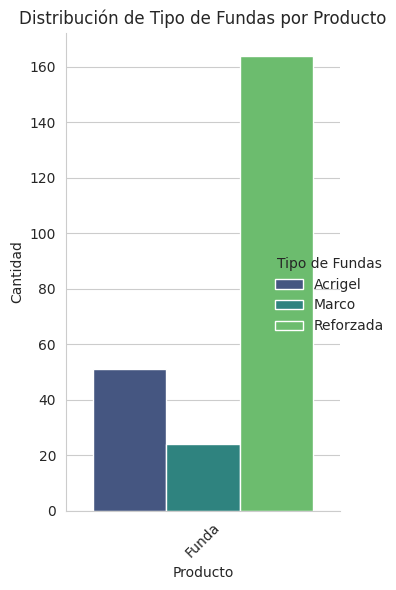

In [ ]:
# Paso 1: Agrupar correctamente
df_Tipo_de_fundas = df.groupby(['Producto ', 'Tipo de Fundas']).size().reset_index(name='Count')

# Paso 2: Establecer estilo
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")  # Estilo limpio

# Paso 3: Crear gráfica
grafica = sns.catplot(
    data=df_Tipo_de_fundas,
    x='Producto ',
    y='Count',
    hue='Tipo de Fundas',
    kind='bar',
    palette='viridis',
    height=6,
    aspect=.4
)

# Paso 4: Ajustes estéticos
plt.title('Distribución de Tipo de Fundas por Producto')
plt.xlabel('Producto')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

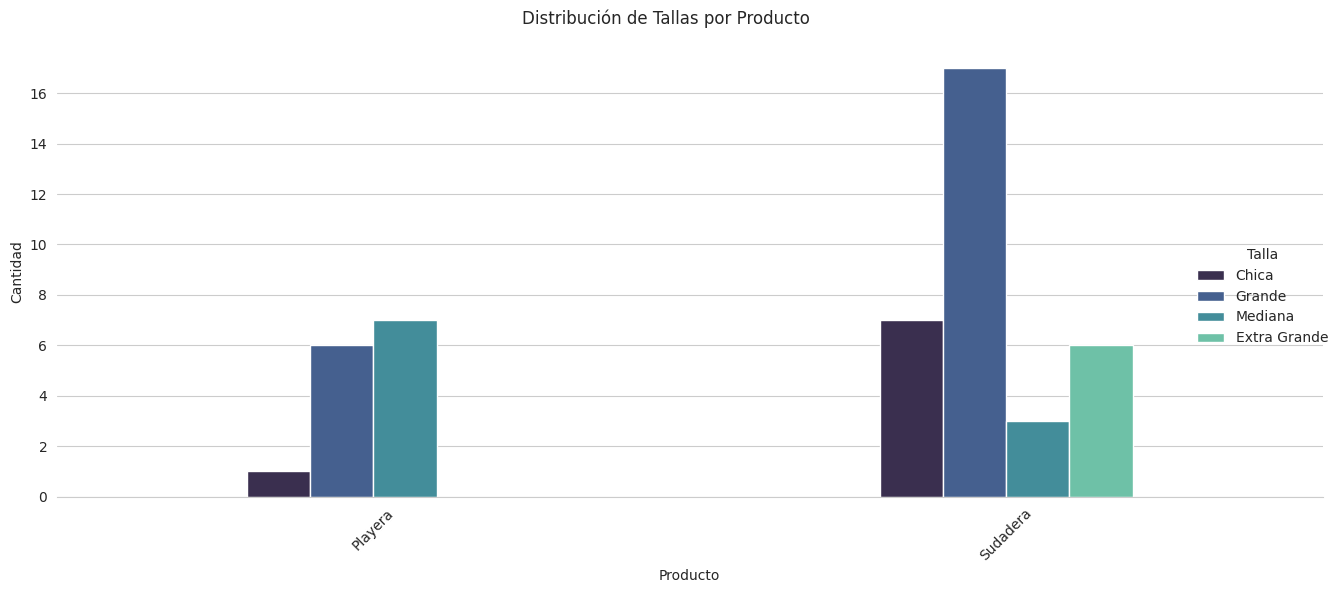

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Paso 1: Agrupar los datos
df_talla = df.groupby(['Producto ', 'Talla']).size().reset_index(name='Count')

# Paso 2: Estilo para visualización
sns.set_style("whitegrid")
palette = sns.color_palette("mako", n_colors=df_talla['Talla'].nunique())

# Paso 3: Crear gráfica
g = sns.catplot(
    data=df_talla,
    x='Producto ',
    y='Count',
    hue='Talla',
    kind='bar',
    palette=palette,
    height=6,
    aspect=2,
    width=0.4
)

# Paso 4: Ajustes estéticos
g.set_axis_labels("Producto", "Cantidad")
g.set_xticklabels(rotation=45)
g.despine(left=True)

# Agregar título correctamente
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Distribución de Tallas por Producto")

plt.tight_layout()
plt.show()


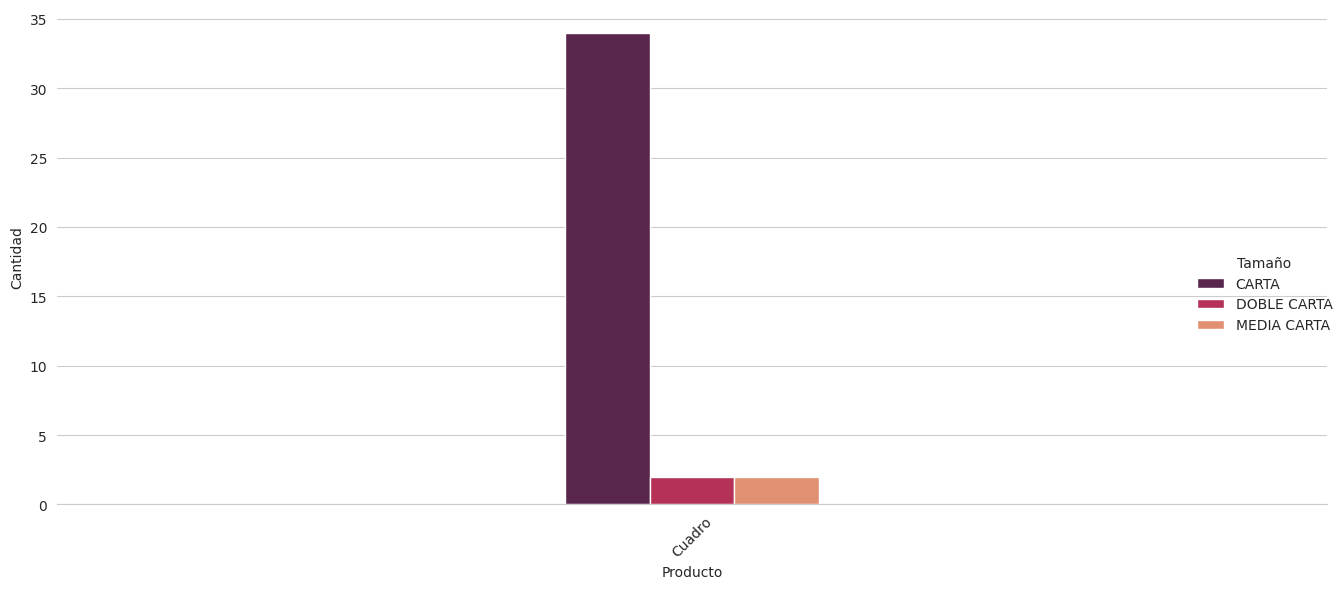

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Paso 1: Agrupar por producto y tamaño
df_tamaño = df['Tamaño'].groupby(df['Producto ']).value_counts()

# Paso 2: Convertir a DataFrame
df_tamaño = df_tamaño.reset_index(name='Count')

# Limpieza de nombres (por si hay espacios)
df_tamaño.columns = df_tamaño.columns.str.strip()

# Paso 3: Estilo visual
sns.set_style("whitegrid")
palette = sns.color_palette("rocket", n_colors=df_tamaño['Tamaño'].nunique())  # Puedes cambiar la paleta

# Paso 4: Crear la gráfica
g = sns.catplot(
    data=df_tamaño,
    x='Producto',
    y='Count',
    hue='Tamaño',
    kind='bar',
    palette=palette,
    height=6,
    aspect=2,
    width=0.2
)

# Paso 5: Ajustes visuales
g.set_axis_labels("Producto", "Cantidad")
g.set_titles("Distribución de Tamaños por Producto")
g.set_xticklabels(rotation=45)
g.despine(left=True)

plt.tight_layout()
plt.show()


##Metrica 2: Ingreso total 2024-2025

In [ ]:
#tener el ingreso total de lo vendido en todo el año
df.columns

Index(['Diseños pedidos', 'Modelo de celular', 'Modelo numero', 'Talla',
       'Tamaño', 'Diseño completos', 'Anticipo', 'Pagos', 'Tipo de Fundas',
       'Color', 'Cliente', 'Producto ', 'Lugar', 'Fecha de entrega',
       'Red social de venta', 'Precio', 'Lugares de Envio', 'Fundas_Talla'],
      dtype='object')

In [ ]:
print(df['Pagos']=='INCOMPLETO')

0      False
1      False
2      False
3      False
4      False
       ...  
319     True
320     True
321     True
322     True
323     True
Name: Pagos, Length: 324, dtype: bool


In [ ]:
# Agrupar por tipo de pago y contar cuántas ventas hay por precio
df_ventas_reales = df.groupby(['Pagos'])['Precio'].value_counts()
df_ventas_reales

Pagos       Precio
COMPLETO    290       118
            250        49
            200        37
            390        33
            320        19
INCOMPLETO  290        46
            200        14
            320         5
            250         3
Name: count, dtype: int64

In [ ]:
# Filtrar por pagos completos y agrupar para calcular la suma de precios
df_pago_completo = df[df['Pagos'] == 'COMPLETO'].groupby('Pagos')['Precio'].sum()
df_pago_completo

,Precio
Pagos,
COMPLETO,72820


In [ ]:
df_pago_incompleto=df[df['Pagos']=='INCOMPLETO'].groupby('Pagos')['Precio'].sum()
df_pago_incompleto

,Precio
Pagos,
INCOMPLETO,18490


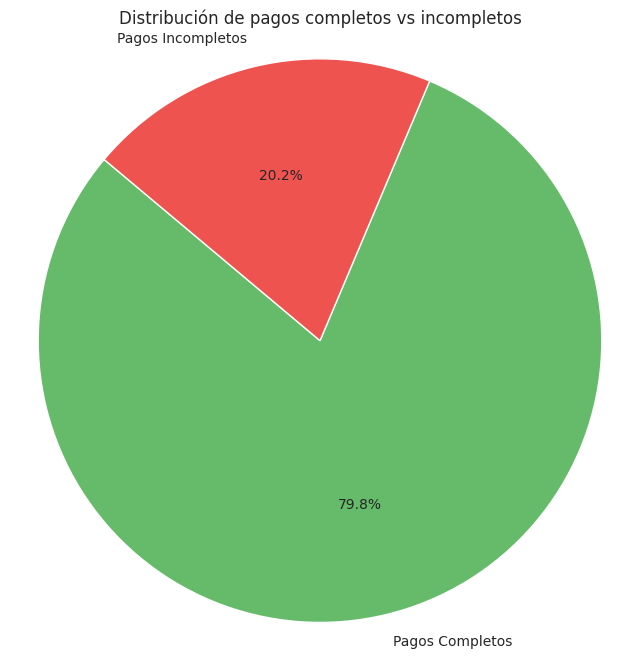

In [ ]:
# Agrupar pagos completos e incompletos
df_pago_completo = df[df['Pagos'] == 'COMPLETO']['Precio'].sum()
df_pago_incompleto = df[df['Pagos'] != 'COMPLETO']['Precio'].sum()

# Datos para la gráfica
valores = [df_pago_completo, df_pago_incompleto]
etiquetas = ['Pagos Completos', 'Pagos Incompletos']
&
# Crear gráfica de pastel
plt.figure(figsize=(8, 8))  # <- Asegúrate de que esto esté así, SIN el igual
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=140, colors=['#66bb6a', '#ef5350'])
plt.title("Distribución de pagos completos vs incompletos")
plt.axis('equal')  # Para que quede redondita
plt.show()

##Metrica 3: Més con mas venta

Text(0.5, 1.0, 'Ventas Mensuales')

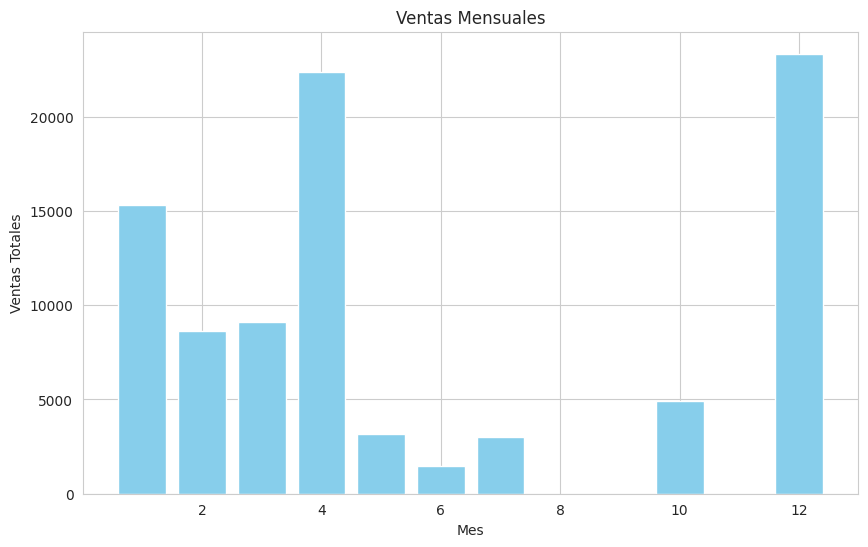

In [ ]:
#Calcular el mes con mas venta
df['Fecha de entrega']=pd.to_datetime(df['Fecha de entrega'])
df['Mes']=df['Fecha de entrega'].dt.month
df['Mes'].value_counts()

ventas_mensuales = df.groupby('Mes')['Precio'].sum()
meses = ventas_mensuales.index
ventas = ventas_mensuales.values

plt.figure(figsize=(10, 6))
plt.bar(meses, ventas, color='skyblue')
plt.xlabel('Mes')
plt.ylabel('Ventas Totales')
plt.title('Ventas Mensuales')

Los meses de Diciembre, Enero y Abril representan más ventas

## Metrica 4: Estado de envio mas frecuente

In [ ]:
df.columns

Index(['Diseños pedidos', 'Modelo de celular', 'Modelo numero', 'Talla',
       'Tamaño', 'Diseño completos', 'Anticipo', 'Pagos', 'Tipo de Fundas',
       'Color', 'Cliente', 'Producto ', 'Lugar', 'Fecha de entrega',
       'Red social de venta', 'Precio', 'Lugares de Envio', 'Fundas_Talla',
       'Mes'],
      dtype='object')

In [ ]:
# Calcularemso el estado con mas envio
df_estado=df['Lugares de Envio'].value_counts()
df_estado

,count
Lugares de Envio,
Guadalajara,34
Yucatán,8
Estado de México,7
Tijuana,7
Monterrey,6
Querétaro,6
Veracruz,6
San Luis Potosí,5


<ipython-input-52-0615464a2df4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Lugares de Envio', palette='viridis')


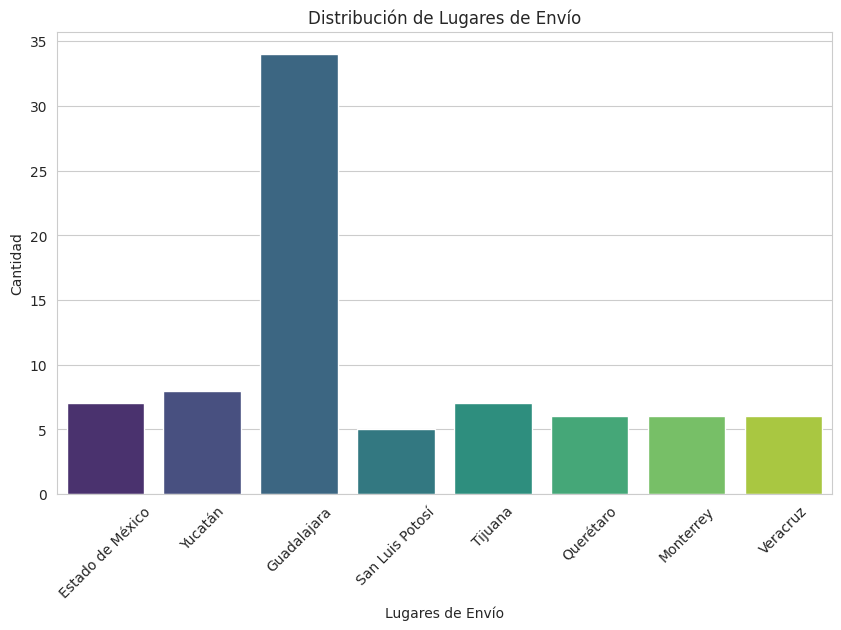

In [ ]:
#Graficamos
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Lugares de Envio', palette='viridis')
plt.title('Distribución de Lugares de Envío')
plt.xlabel('Lugares de Envío')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

El estado donde mas se envio fue Guadalajara, ya que aqui hay que recordar que un tiempo aprox de un mes se tenian una sucursal pero aun asi muestra un estado donde se envian más seguido, quizas porque las cuentas controladas se hciieron a partir un registro GPS en Guadalajara, por lo que esto involucra ingluencia atravez del algoritmo de las redes sociales

##Metrica 5: Red social con mas fluencia o valor en el mercado

In [ ]:
#Calcular las valors exactos de las redes sociales
df_redes=df['Red social de venta'].value_counts()
df_redes

,count
Red social de venta,
Facebook,251
Instagram,69
Whatsapp,4


<ipython-input-54-99b17463935a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Red social de venta', palette='viridis')


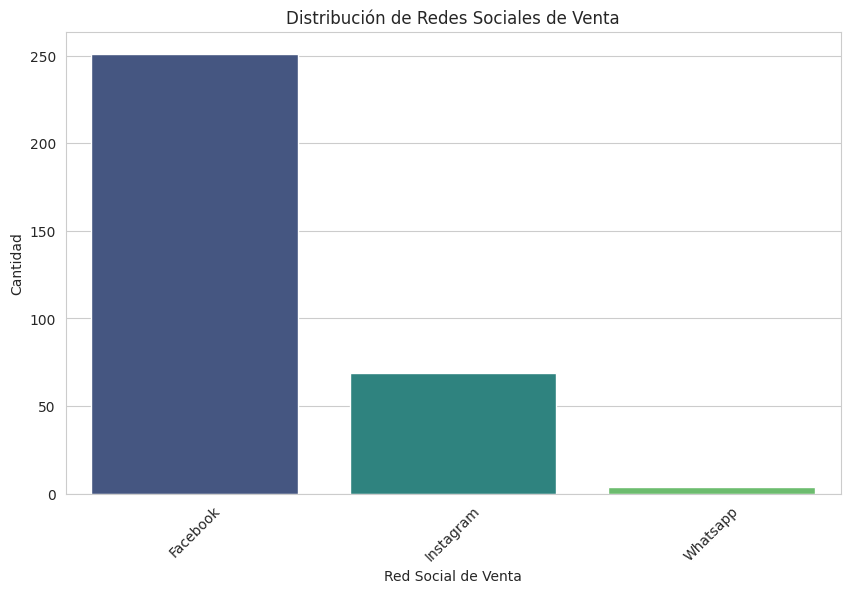

In [ ]:
#Graficamos
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Red social de venta', palette='viridis')
plt.title('Distribución de Redes Sociales de Venta')
plt.xlabel('Red Social de Venta')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

Se puede observar como Facebook es la red socual más usada para ventas, pero aqui podemos analizar un poco, por ejemplo, los pagos incompletos en que redes sociales hubo mas

In [ ]:
#Agrupamos las redes socuales con los pagos
df_redes_pagos=df.groupby(['Red social de venta','Pagos']).size().reset_index(name='Count')
df_redes_pagos

,Red social de venta,Pagos,Count
0,Facebook,COMPLETO,200
1,Facebook,INCOMPLETO,51
2,Instagram,COMPLETO,54
3,Instagram,INCOMPLETO,15
4,Whatsapp,COMPLETO,2
5,Whatsapp,INCOMPLETO,2


Text(0.5, 1.0, 'Distribución de Pagos por Red Social de Venta')

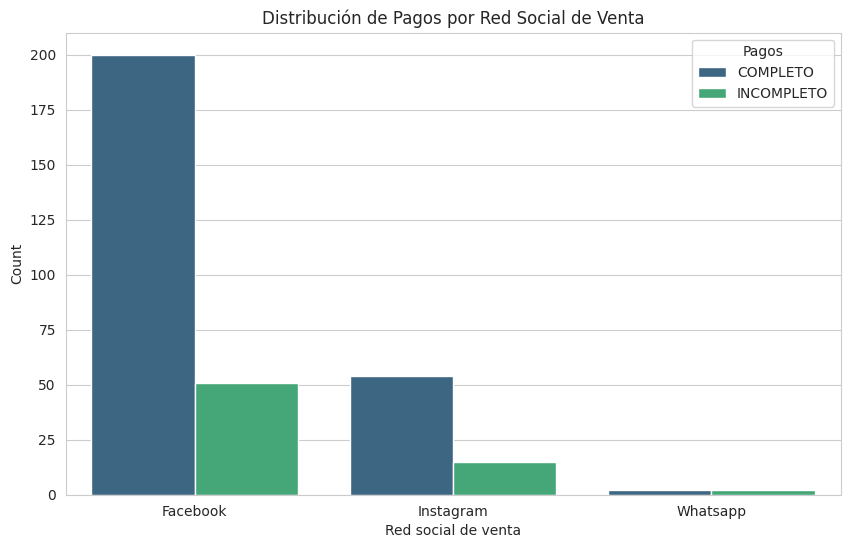

In [ ]:
#Graficamos estos datos
plt.figure(figsize=(10,6))
sns.barplot(data=df_redes_pagos, x='Red social de venta', y='Count', hue='Pagos', palette='viridis')
plt.title('Distribución de Pagos por Red Social de Venta')

Se puede observar que en cada red social al menos en facebook e instagram es del 20% de incompleto

**Nota**: Hay que tener en cuenta que conocer la historia de las ventas es importante, las ventas con mayor satisfacción fueron a travez de instagram, ya que no hubo prpoblema con el tiempo y el pago, el tema de Facebook es que las entregas son personales y en Instragram son por envios, esto quiere decir que se llega a ser mas facil los envios que las entregas por el tiempo de traslado, ademas de que sube el precio, y muchas personas no estan de acuerdo en esto


**Nota 2:** tambien es importante considera que para que la gente pida más en instragram se ha vinculado tambien con la cuenta de Tik Tok, donde se ha hecho mas publicidad en cuanto fundas y playeras, esta red social no se considera aqui ya que es mas influecia de seguidores y como publicidad, y no se cuenta como fuente de ingreso todavia